<a href="https://colab.research.google.com/github/akluthra/GitHub_AKL/blob/master/ISM663_MidTermPt1_AKLComplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deliverables: Please compelete this Notebook following MINST Data Set notebook. Upload to Canvas by the Deadline Specified for the Midterm Exam. NO LATE SUBMISSIONS WILL BE ACCEPTED. EACH DAY LATE INCURS A PENALTY OF 10 PERCENT OF THE MIDTERM EXAM GRADE.

ISM 663 Midterm Exam - Fashion MINST Data Set for Image Classification
Note: Please abide by UNCG Academic Integrity Policy. Do NOT use any Gen AI Coding Assistant and that will violate UNCG Academic Integrity Policy as per this Exam you are NOT allowed to use Gen AI. This should be solely individual work and NO collaboration and consultation or help from anyone in any form.
You will find cells with Question that you are required to answer per this Exam
Anita Luthra - October 20, 2024,
ISM 663 - Neural Networks, Professor AF Salam

ISM 663 MidTerm Part I Fall 2024, following example of previously delivered MNIST Delivery Name: Anita Luthra Professor: Dr. A.F. Salam Computer Vision Part 1: MNIST Digit Classification

In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous MNIST dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes will need to be counted and defined per the column rows as set up for this exam

Process: Step 1, upload appropriate file, install dependencies, and import the relevant packages needed for this lab.


Anita Luthra - October 20, 2024,
Mid-Term ISM 663 - Neural Networks
Professor AF Salam

In [ ]:
##ISM 663 Midterm Exam - Fashion Minst Dataset
# NN Training
import tensorflow as tf # at least version 2.0
import numpy as np
from tensorflow import keras

print("tensorflow version= " + tf.__version__)

import pandas as pd
import matplotlib.pyplot as plt


## install other packages such as
#import seaborn as sns
#import random
#from tqdm import tqdm

tensorflow version= 2.17.0


In [ ]:
# Define the neural network and parameters
# Epoch - how long the training should last
# Batch size - number of samples in the NN
# Validation Split / Validation Sample - amount of hold out data left to validate against
EPOCHS = 20
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2
VERBOSE = 1 # detailed

In [ ]:
#import the keras dataset from the MNIST library
# Import Fashion MINST Data Set fron Tensorflow Library

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('train_images.shape=',train_images.shape)
print('test_images.shape=',test_images.shape)
print('train_labels.shape=',train_labels.shape)
print('test_labels.shape=',test_labels.shape)

train_images.shape= (60000, 28, 28)
test_images.shape= (10000, 28, 28)
train_labels.shape= (60000,)
test_labels.shape= (10000,)


In [ ]:
#Note there are 10 Classes of Clothes as part of the Fashion MINST Dataset but these do NOT come with the Dataset
# So we will create a class_names array to hold the names of the classes of clothes

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore Data Set
train_images.shape

(60000, 28, 28)

In [ ]:
# check the number of trained labels
len(train_labels)

60000

In [ ]:
 # now train the labels - one hot encoding (boolean, true/false)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

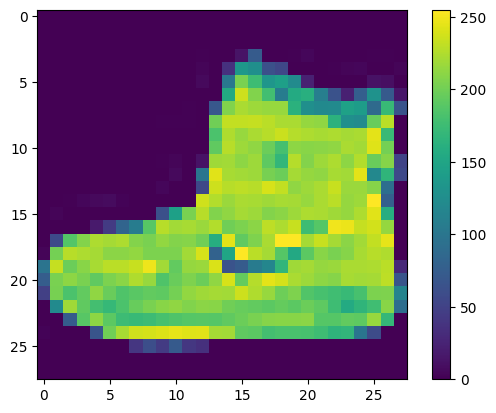

In [ ]:
#View an image to see how it looks

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()



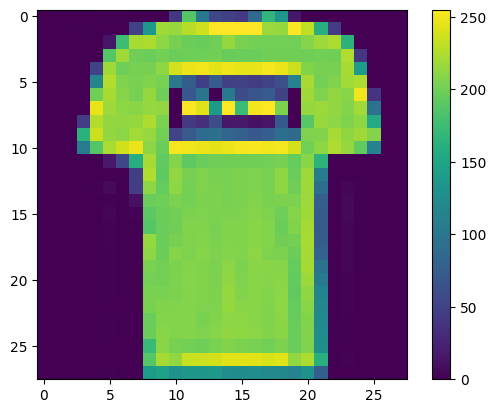

In [ ]:
#View an image to see how it looks

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


## Question: Show a different image such as at index 1500

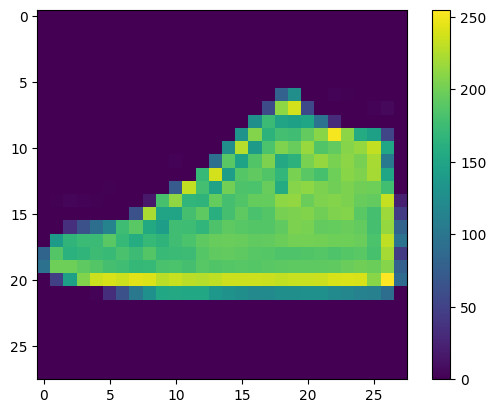

In [ ]:
# Place your answer code here and run to show the image at index 1500. When your code is run, it will display the image
#View an image to see how it looks
# Note - 1500 did not look good, but 1501 did

plt.figure()
plt.imshow(train_images[1501])
plt.colorbar()
plt.grid(False)
plt.show()


## Now lets get familiar with the Data Set Images

<ipython-input-154-c7fa55ae01b7>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 10, i+1)


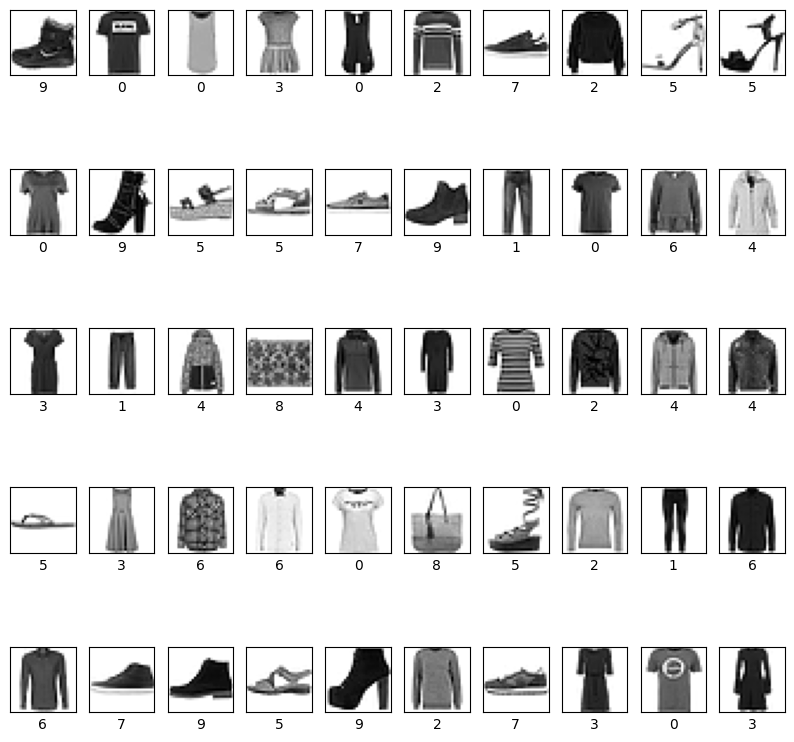

In [ ]:
# Display first 25 images to make sure we got the correct data

plt.figure(figsize=(10,10))

plt.title("50 images with numeric class labels of 0-9")
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xlabel(train_labels[i])

plt.show()

<ipython-input-155-69c00725b726>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 10, i+1)


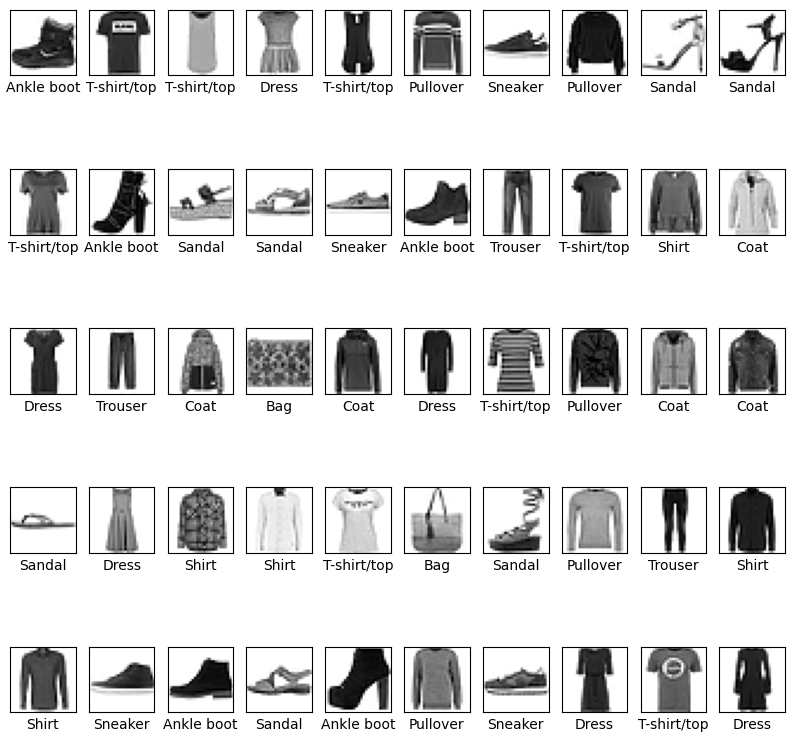

In [ ]:
plt.figure(figsize=(10,10))

plt.title("50 images with corresponding class labels in English" )
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## Question: Now you complete the NN Model to Classify Fashion MINST Dataset similar to what you have done using MINST Data Set

In [ ]:
# train images = 60k rows X 784 = 28 X 28 = 784
# test data = 10,000

train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

#convert pixels format from uint8 (0 to 255) to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#normalize values from 0-255 to 0-1
train_images /= 255
test_images /= 255

print('train_images.shape[0]=',train_images.shape[0],'training samples')
print('test_images.shape[0]=',test_images.shape[0],'test samples')

train_images.shape[0]= 60000 training samples
test_images.shape[0]= 10000 test samples


In [ ]:
len(test_labels)

10000

In [ ]:
# test images
test_images.shape

(10000, 784)

In [ ]:
# One Hot Encoding
NB_CLASSES = 10 # the classes match the identified labels = 10, per column headings above

train_labels = keras.utils.to_categorical(train_labels, NB_CLASSES)
test_labels = keras.utils.to_categorical(test_labels, NB_CLASSES)
print('train_labels=',train_labels)
print('test_labels[4]=',test_labels[4])

print('train_labels.shape=',train_labels.shape)
print('test_labels.ahape=',test_labels.shape)

train_labels= [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
test_labels[4]= [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
train_labels.shape= (60000, 10)
test_labels.ahape= (10000, 10)


In [ ]:
# Visualize Neural Network and InterConnection layers
# Visualize Neural Network with 784 Input Layers 10 Neuron Hidden_Layer and 10 Neuron Output_Layer
# Neural Networks need a linear representation of all the pixels
#keras.src.models.sequential.Sequential.add
#def add(layer, rebuild=True

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(784, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,400 (2.38 MB)

 Trainable params: 623,400 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Add Optimizer to Guide the Neural Network Model Training or More Accuracy

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Train the NN Model Using a Training Data Set
# Set Aside 20% of the Data for Validation Testing

model.fit(train_images, train_labels,
          batch_size=BATCH_SIZE,
          epochs=50,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)
print(model.summary())


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3504 - loss: 1.8198 - val_accuracy: 0.7307 - val_loss: 0.8807
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7479 - loss: 0.7979 - val_accuracy: 0.7803 - val_loss: 0.6593
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7811 - loss: 0.6452 - val_accuracy: 0.8011 - val_loss: 0.5892
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8011 - loss: 0.5780 - val_accuracy: 0.8082 - val_loss: 0.5579
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8124 - loss: 0.5417 - val_accuracy: 0.8210 - val_loss: 0.5237
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8222 - loss: 0.5182 - val_accuracy: 0.8273 - val_loss: 0.5031
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8278 - loss: 0.4932 - val_accuracy: 0.8293 - val_loss: 0.4895
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8299 - loss: 0.4877 - val_accu

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,402 (2.38 MB)

 Trainable params: 623,400 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
# Evaluate the Trained NN Model Using the Test Data Set and Test Labels

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Train Accuracy:', train_acc)
print('Train Loss:', train_loss)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8985 - loss: 0.2880
Train Accuracy: 0.8953499794006348
Train Loss: 0.29860982298851013
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8754 - loss: 0.3598
Test Accuracy: 0.8697999715805054
Test Loss: 0.3654853403568268


In [ ]:
# Prediction Using Trained NN Model Using Test Images Not Seen by the Model Before

test_trained_image = test_images[0:20]
predictions = model.predict(test_images)
print('prediction_7=',predictions[7])
print('max # of predictions=',predictions[7].argmax())
print(predictions[7][9])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
prediction_7= [3.7695927e-04 9.7935335e-05 7.9200370e-03 1.2252873e-04 2.2035051e-02
 6.6159487e-06 9.6805346e-01 4.8053522e-10 1.3868490e-03 5.2824282e-07]
max # of predictions= 6
5.282428e-07


# As the results show, the training accuracy higher than the validation accuracy.
This model was run for 50 epochs to understand the pattern and to find its outer bounds. Results show possible Overfitting: The model might be learning the training data too well, and is not generalizing the new data. Approaches to solve are:

Stop Training earlier: Stop training before the model overfits. Monitor the validation loss and stop training when it starts to increase. Reduce model complexity: Simplify the model by decreasing the number of layers or neurons. Look at the results of Epochs 4-6, and Epoch 8. After that the val_accuracy significantly begins to decrease

Add regularization: Techniques like dropout or L1/L2 regularization to help prevent overfitting. Get more data: More data can help the model learn more general patterns. Augment the data: Artificially increase the dataset size by creating variations of existing data (e.g., image rotations, flips).

Q2 - More mistakes in the validation datasets Less mistakes in the training datasets Explain why? Overfitting - The model has learned the training dataset too well. So it is performing very accurately on the training data.
It is performing poorly on unseen data, such as the data validation set. So the model is memorizing the training dataset instead of actually learning general patterns. Hence the discrepancy between the training and validation data sets

Q3 - Why is the accuracy only 0.8754 on test data, with an loss of 0.3598. How can this be improved?
Train for fewer epochs to prevent overfitting, or get more data. I checked several of the images and the quality of the images and data is poor also.
